In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy import ndimage

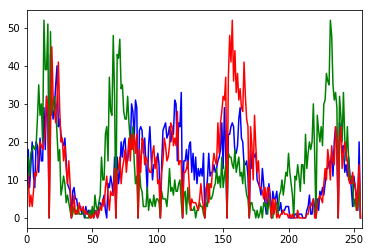

In [3]:
target_img = cv2.imread("./dataset/105-1.jpg")
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    target_hist = cv2.calcHist([target_img], [i], None, [256], [15, 256])
    plt.plot(target_hist, color=col)
    plt.xlim([0,256])
plt.show()

In [4]:
def get_contour(img, team):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gaus = cv2.GaussianBlur(gray, (11, 11), 0)
    th2 = cv2.adaptiveThreshold(gaus, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 3)
    contours = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[1]
    contours = [x for x in contours if cv2.contourArea(x) > 60000]
    party = []
    for i, c in enumerate(contours):
        x, y, w, h = cv2.boundingRect(c)
        trim = img[y:y+h, x:x+w]
        party.append([np.sum(trim[:, :, 0] > trim[:, :, 1]), c])
    return team(party, key=lambda x:x[0])[1]

In [5]:
img_path = "./error1.jpg"
img = cv2.imread(img_path)
orgHeight, orgWidth = img.shape[:2]

area = orgHeight * orgWidth

magni = 1000 / orgWidth
img = cv2.resize(img, (int(orgWidth * magni), int(orgHeight * magni)))
print(int(orgWidth*magni), int(orgHeight*magni))

1000 1777


In [23]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gaus = cv2.GaussianBlur(gray, (5, 5), 0)
# lap = cv2.Laplacian(gaus, cv2.CV_8UC1)

# sobel = cv2.Sobel(gaus, cv2.CV_8UC1, 0,1,ksize=3)
# bila = cv2.bilateralFilter(gray, 9, 40, 40)
# blur = cv2.blur(gray, (5,5), 0)
# lap = cv2.Laplacian(gaus, cv2.CV_8UC1)
# canny_img = cv2.Canny(gray, 100, 200)
# print(lap.shape)
# _, th2 = cv2.threshold(gaus, 100, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(gaus, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 3)
contours = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[1]
contours = [x for x in contours if cv2.contourArea(x) > 55000]

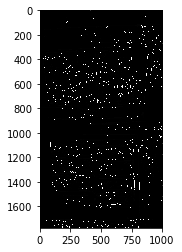

In [28]:
plt.imshow(th2, cmap="gray")
# plt.imshow(canny_img, cmap="gray")

4
22 339 309 442
19 335 316 449
453 324 289 451
450 320 295 458


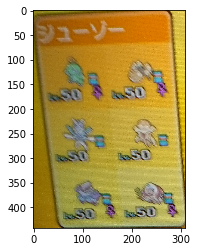

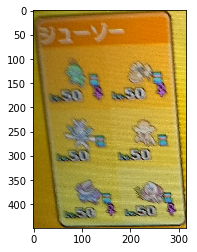

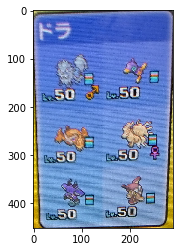

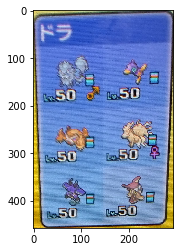

In [30]:
party = []
print(len(contours))
for i, c in enumerate(contours):
    x, y, w, h = cv2.boundingRect(c)
    print(x, y, w, h)
    trim = img[y:y+h, x:x+w]
    party.append([np.sum(trim[:, :, 0] > trim[:, :, 1]), c])
    plt.figure()
    plt.imshow(trim)

In [9]:
np.array(min(party, key=lambda x: x[0])[1]).shape

(195, 1, 2)

In [10]:
min(party, key=lambda x: x[0])[1]

array([[[710, 325]],

       [[711, 324]],

       [[713, 324]],

       [[714, 325]],

       [[715, 324]],

       [[730, 324]],

       [[732, 326]],

       [[733, 326]],

       [[734, 327]],

       [[735, 327]],

       [[739, 331]],

       [[739, 333]],

       [[740, 334]],

       [[740, 335]],

       [[741, 336]],

       [[741, 353]],

       [[740, 354]],

       [[740, 355]],

       [[741, 356]],

       [[741, 358]],

       [[740, 359]],

       [[741, 360]],

       [[741, 362]],

       [[740, 363]],

       [[740, 398]],

       [[739, 399]],

       [[740, 400]],

       [[739, 401]],

       [[739, 439]],

       [[738, 440]],

       [[738, 467]],

       [[737, 468]],

       [[737, 496]],

       [[736, 497]],

       [[736, 524]],

       [[735, 525]],

       [[735, 550]],

       [[734, 551]],

       [[734, 577]],

       [[733, 578]],

       [[733, 600]],

       [[732, 601]],

       [[732, 624]],

       [[731, 625]],

       [[731, 648]],

       [[7

In [13]:
# rect = cv2.minAreaRect(party, key=lambda x: x[0])

In [14]:
rect = cv2.minAreaRect(min(party, key=lambda x: x[0])[1])

In [15]:
box = cv2.boxPoints(rect)

In [16]:
box = sorted(box, key=lambda x: x[1])

In [17]:
target = [box[0], box[1]] if np.linalg.norm((box[0] - box[1]).astype(np.float64)) < np.linalg.norm((box[1] - box[2]).astype(np.float64)) else [box[1], box[2]]
k = math.atan2(target[1][0] - target[0][0], target[1][1] - target[0][1])
result = ndimage.rotate(img, 90 - math.degrees(k))

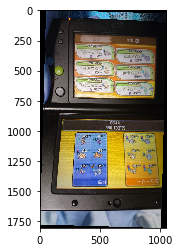

In [18]:
plt.imshow(result)

In [19]:
x, y, w, h = cv2.boundingRect(min(party, key=lambda x: x[0])[1])
a = result[y:y+h, x:x+w]

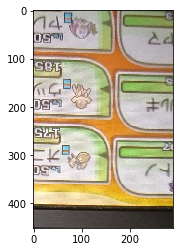

In [20]:
plt.imshow(a)